In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

def get_keywords(df, age_group):
    """This method extracts the top relevant 50 keywords according to
    their TF-IDF score, plot them as a word cloud and save screenshot"""

    corpus = df.words
    # vectorizing and removing stop words
    tfidf = TfidfVectorizer(max_features=1000, stop_words=stopwords)
    X = tfidf.fit_transform(corpus)
    #print("ok")
    df1 = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names())
    df.drop('words', axis=1, inplace=True)
    res = pd.concat([df, df1], axis=1)
    df1.T.sum(axis=1)
    cloud = WordCloud(background_color="white", max_words=50, stopwords=stopwords).generate_from_frequencies(df1.T.sum(axis=1))
    plt.figure(figsize=[12,10])
    plt.imshow(cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    age_range = get_age_range(age_group)
    plt.title('Wordcloud of Age Group ' + age_range)
    plt.savefig(age_range+'.png')
    plt.close()


def get_age_range(age_group):
    """ This method returns the age group description"""
    switcher = {
        1: "18 to 29 years",
        2: "30 to 39 years",
        3: "40 to 49 years",
        4: "50 to 59 years",
        5: "60 to 69 years"
    }
    return switcher[age_group]




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


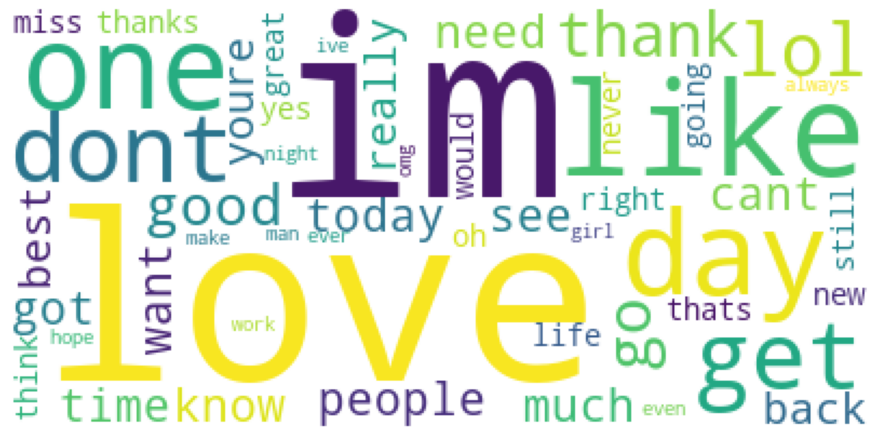

In [2]:
df_score = pd.read_csv('df_all_labelled_short.csv', header=0, sep=',', encoding='utf-8', skip_blank_lines=True)
for i in range(1, 6):
    is_range_of = df_score['_range_age'] == i
    df_age = df_score[is_range_of]
    df_age = df_score.fillna('')
    df = df_age[['words', '_range_age']].copy()
    get_keywords(df, i)
    break